# <font color=#F90499>**Modelo Hackathonnn**</font>
***

## <font color=#05C0F3>**Introduccion al problema**</font>

### **Sector del negocio**

Atención al cliente / Marketing / Operaciones — empresas que recopilan opiniones de clientes (reseñas, comentarios en redes sociales, encuestas de satisfacción) y quieren entender rápidamente si el sentimiento es positivo, neutro o negativo.
***

### **Descripción del proyecto**

Crear una API simple que recibe textos (comentarios, reseñas o tweets), aplica un modelo de Data Science para clasificar el sentimiento (Atrasado / Puntual → en este caso: Positivo / Neutro / Negativo o binario Positivo / Negativo) y devuelve el resultado en formato JSON, permitiendo que las aplicaciones consuman esta predicción automáticamente.
***

### **Necesidad del cliente (explicación no técnica)**

Un cliente (empresa) recibe muchos comentarios y no puede leerlos todos manualmente. Quiere:

1. saber rápidamente si los clientes se están quejando o elogiando;

2. priorizar respuestas a comentarios negativos;

3. medir la satisfacción a lo largo del tiempo.

Este proyecto ofrece una solución automática para clasificar mensajes y generar información accionable.
***

### **Validación de mercado**

Analizar si el sentimiento es útil para:

- acelerar la atención al cliente (identificar urgencias);

- monitorear campañas de marketing;

- comparar la imagen de la marca a lo largo del tiempo.

Incluso una solución simple (modelo básico) tiene valor: las pequeñas y medianas empresas utilizan herramientas similares para entender los feedbacks sin un equipo dedicado.
***

### **Expectativa para este hackathon**

**Público:** estudiantes sin experiencia profesional en el área de tecnología, que estudiaron Back-end (Java, Spring, REST, persistencia) y Data Science (Python, Pandas, scikit-learn, notebooks).

**Objetivo:** entregar un MVP funcional que demuestre la integración entre DS y Back-end: un notebook con el modelo + una API que carga ese modelo y responde a las peticiones.

**Alcance recomendado:** clasificación binaria (Positivo / Negativo) o ternaria (Positivo / Neutro / Negativo) con un modelo simple — por ejemplo, usar TF-IDF (una técnica que transforma el texto en números, mostrando qué palabras son más importantes) junto con Regresión Logística (un modelo de aprendizaje automático que aprende a diferenciar sentimientos).
***

### **Entregables deseados**

Notebook (Jupyter/Colab) del equipo de Data Science que contenga:

1. Exploración y limpieza de los datos (EDA);

2. Transformación de los textos en números con TF-IDF;

3. Entrenamiento de modelo supervisado (ej.: Logistic Regression, Naive Bayes);

4. Métricas de desempeño (Accuracy, Precision, Recall, F1-score);

5. Serialización del modelo (joblib/pickle).
***

### **Documentación mínima (README):**

- Cómo ejecutar el modelo.

- Dependencias y versiones de las herramientas.

- Demonstración funcional (Presentación corta).

- Explicar cómo el modelo llega a la predicción.
***

### **Funcionalidades exigidas (MVP)**

1. El servicio debe exponer un endpoint que devuelve la clasificación del sentimiento y la probabilidad asociada a esa clasificación. Ejemplo: POST /sentiment — acepta JSON con campo text y devuelve: `{ "prevision": "Positivo", "probabilidad": 0.87 }`

2. Modelo entrenado y cargable: el back-end debe poder usar el modelo (cargando archivo) o hacer una petición a un microservicio DS que implemente la predicción.

3. Validación de input: verificar si text existe y tiene longitud mínima; devolver error amigable en caso contrario.

4. Respuesta clara: label (+ probabilidad en 0–1) y mensaje de error cuando sea aplicable.

5. Ejemplos de uso: Postman/cURL con 3 ejemplos reales (positivo, neutro, negativo).

6. README explicando cómo ejecutar (pasos simples) y cómo probar el endpoint.
***

### **Equipo de Data Science**

- Cada equipo debe elegir o armar su propio conjunto de datos de comentarios, reseñas o publicaciones que puedan utilizarse para el análisis de sentimientos (ej.: reviews públicos, tweets, evaluaciones de productos, etc.).

- usar Python, Pandas para leer/limpiar datos;

- crear un modelo simple (TF-IDF + LogisticRegression de scikit-learn);

- guardar el pipeline y el modelo con joblib.dump.

- Poner todo en un notebook bien comentado.
***

### **Contrato de integración (definido entre DS y BE)**


Recomendamos definir desde el principio el formato JSON de entrada y salida. Sigue un ejemplo:

{"text": "..."} →

{

"prevision":"Positivo",

"probabilidad":0.9

}
***

## <font color=#05C0F3>**Librerias**</font>

In [1]:
import pandas as pd
# pd.set_option('display.max_colwidth', None)

import numpy as np

# Graficos
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid")

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Separador de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Modelo
from sklearn.linear_model import LogisticRegression

# Metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluacion de metricas
from sklearn.metrics import classification_report

# Pipeline de prediccion
from sklearn.pipeline import Pipeline

# Serializacion
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font color=#05C0F3>**Datos de comentarios de peliculas en IMDB**</font>

In [3]:
datos = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/7. Modelo Hackathon/datos/IMDB Dataset SPANISH.csv')

In [4]:
datos = datos[['review_es', 'sentimiento']]

In [5]:
display(datos)

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo
49997,Soy católica enseñada en escuelas primarias pa...,negativo
49998,Voy a tener que estar en desacuerdo con el com...,negativo


***

## <font color=#05C0F3>**Analisis exploratorio de datos**</font>
***

### **Muestreo Aleatorio**

In [6]:
datos.head(10)

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
5,Probablemente mi película favorita de todos lo...,positivo
6,Seguro que me gustaría ver una resurrección de...,positivo
7,"Este espectáculo fue una idea increíble, fresc...",negativo
8,Alentados por los comentarios positivos sobre ...,negativo
9,"Si te gusta la risa original desgarradora, te ...",positivo


In [7]:
datos.tail(10)

,review_es,sentimiento
49990,"Cojo, cojo, cojo !!!Un festival de 90 minutos ...",negativo
49991,"Les Visiteurs, la primera película sobre los v...",negativo
49992,John Garfield interpreta a un marine que está ...,positivo
49993,Robert Colomb tiene dos trabajos a tiempo comp...,negativo
49994,Esta es tu comedia de chatarra típica. Casi no...,negativo
49995,Pensé que esta película hizo un buen trabajo a...,positivo
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo
49997,Soy católica enseñada en escuelas primarias pa...,negativo
49998,Voy a tener que estar en desacuerdo con el com...,negativo
49999,Nadie espera que las películas de Star Trek se...,negativo


In [68]:
datos.sample(10)

,review_es,sentimiento,n_palabras
35202,Sobrevalorado y solo para aquellas personas en...,negativo,110
44602,Kasparov contra el azul profundo es sin duda u...,negativo,312
39857,"Admito que he visto tal vez cinco minutos de ""...",negativo,263
40007,El bajo presupuesto Schlockmeister Herschell G...,negativo,171
15982,Dominick (Nicky) Luciano wears a 'Hulk' T-shir...,positivo,901
20673,El palacio de Brokedown es verdaderamente un t...,positivo,203
12539,We see a body of dead girl in a morgue with th...,negativo,544
20255,"Sí, eso es verdad.Esa película es una pieza ho...",negativo,60
18037,When you look at this now and hear all the lan...,negativo,168
330,"No esperaba mucho de esta película, pero Boy-O...",negativo,103


### **Verificación de Dimensiones y Tipos**

In [9]:
print(f'Los datos tienen {datos.shape[0]} filas y {datos.shape[1]} columnas.')

Los datos tienen 50000 filas y 2 columnas.


In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_es    50000 non-null  object
 1   sentimiento  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### **Eliminando duplicados**

In [11]:
datos.shape

(50000, 2)

In [12]:
datos.drop_duplicates()

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo
49997,Soy católica enseñada en escuelas primarias pa...,negativo
49998,Voy a tener que estar en desacuerdo con el com...,negativo


In [13]:
datos.shape

(50000, 2)

No hay datos dulicados

### **Longitud de los textos**

In [14]:
datos.describe()

,review_es,sentimiento
count,50000,50000
unique,49599,2
top,"Hilarante, limpio, alegre y digno de cita.¿Qué...",positivo
freq,4,25000


In [15]:
datos['review_es'].describe()

,review_es
count,50000
unique,49599
top,"Hilarante, limpio, alegre y digno de cita.¿Qué..."
freq,4


In [16]:
datos['n_palabras'] = datos['review_es'].str.split().str.len() # Separa todas las palabras del comentario y las cuenta
datos['n_palabras']

,n_palabras
0,345
1,161
2,173
3,137
4,237
...,...
49995,170
49996,105
49997,246
49998,232


In [17]:
datos['n_palabras'].describe()

,n_palabras
count,50000.000000
mean,237.233680
std,179.529306
min,6.000000
25%,123.000000
50%,172.000000
75%,293.000000
max,2450.000000


#### Longitud extrema: análisis más profundo de outliers

In [20]:
datos['n_palabras'].quantile([0.90, 0.95, 0.99])

,n_palabras
0.90,473.00
0.95,622.00
0.99,912.01


In [235]:
pd.set_option('display.max_colwidth', None)

In [273]:
datos.loc[datos['n_palabras'] > 1000, 'review_es'].sample(1)

42348    Yeah, what did I expect? I thought this would be a film about young adults at their turning-point in life, something like "Sonnenallee" or "American Pie", which I liked a lot I wanted to see a funny film, perhaps with an ironic look on idyllic Wuerzburg And what did I get?Attention, spoilers ahead!This film starts with a lengthy dialogue which gives you a good hint of what will inevitably follow: more lengthy dialogues Sometimes I thought Moritz Bleibtreu might have forgotten his text and trying to hide that fact by improvising and just repeating what he was saying before But as I think of Bleibtreu as one of the better german actors, I believe that this effect really was intended I think the author wanted to show how boring talking to close friends can be - especially when they are stoned But really, I don't need cinema to be bored by stoned friends' talk Boring dialogues make up most of this filmBut okay, that's one thing I can cope with that, I have seen nice films with abominable dialogues, just think of Schwarzenegger's life's work But the next thing is that characters are cheap and flat and that the storyline is as foreseeable as anything Just one example (SPOILER!!): Why, do you think, does someone take a garden hose to his hemp-plants deep in the forest? To water them? Of course not, usually you don't find water-pipes deep in forests, do you? The only reason this water-hose is there is that a hunter who happens to come by while the two protagonists are harvesting their dope can be drugged, maltreated and finally filled up with three bottles of Jaegermeister I truly hated this scene, because it's really violent Usually, I don't mind violence in films - slapstick-comedies are full of it But in that sort of comedy there is a silent agreement between the film and you that people don't get hurt if they fall on their faces or get beaten with chairs or things like that But if that happens in a film which is otherwise realistic enough, slapstick-scenes also seem real In this particular scene in "Lammbock" I really thought that this hunter must be badly injured, if not dead - the final scene really invoked in me the impression that he is left to die there, totally filled up with more booze anyone could handle And the protagonists just walk away It would have been otherwise if the author had consistently followed one style; the scene could have been quite funnyTalking about being consistently - that's what I missed most about this film The whole film seems to be a listing of small episodes that came to the author's mind Things just happen without a apparent reason - yeah, I know, that's life, but that's not cinema, because cinema is meant to tell a story, not to show boring episodes without any significance I found myself asking "Where's the point?" all the time Characters besides the two main ones are not elaborated, you never get to know why the protagonist's sister wants to sleep with his best friend Kai, in fact, she tells you but I could not buy it, not at all I think she just was there to give Kai an opportunity to act this childish AIDS-test sketch, which you sure have seen a thousand times before, and mostly better The protagonist's girlfriend you meet once, then she leaves Germany (what you don't even see and the guy doesn't seem to care) and finally it is mentioned in one sentence that she has met someone else in America and splits up with the protagonist It seemed to me that the author wanted to tie up a few loose ends He actually didn't, you never really get to know what's so bad about studying law, being daddy's son (daddy fixes everything in the end and serves coffee in the middle of the night, which to my mind made him one of the nicer characters in the whole film) and living in beautiful Wuerzburg Even the dinner with daddy's layer-friend, which maybe was intended to show how horrible it is to have to live up to dad's expectations, seemed flat, just another nice dinner with the family's friends (except f

In [117]:
datos[['review_es', 'n_palabras']].query('n_palabras > 500').sample(10)

review_es  \
11837                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Justo a tiempo para capitalizar la versión de película tan esperada de "Dreamgirls" es el lanzamiento de DVD de este melodrama musical semi-olvidado de 1976 que también asume el aumento de los Supremes como su inspiración. Lanzados cinco años antes de la apertura de Broadway de "Dreamgirls" y parcialmente establecidos en el mismo período, tiene un reparto predominantemente negro y una historia que se rehuerza en torno a un grupo de niñas que se alza, y ahí es donde termina el parecido básicamente. Escrito por Joel Schumacher, antes de convertirse en un director de gran liga del producto principal de Studio ("Batman Forever", "El fantasma de la ópera"), esta película parece un grave en la superficie. Sin embargo, es cierto que, Schumacher debilita la historia y el desarrollo de los personajes al inyectar una abundancia de clichés y revestimientos de un solo revestimiento. Con poca afinidad por organizar números musicales, Sam O'steen, un editor de cine muy considerado, pero el director de neófito, conde la producción como una película de televisión de bajo presupuesto con una estructura frustrante y episódica. La historia sigue a tres hermanas Harlem - Sexy hermana, yo -thoroshoros y Sweet Sparkle, ya que cantan en el coro de la iglesia, conozcan a los muchachos suaves pero bien intencionados en STIX y LEVI, y luego encuentran su primer sabor del éxito como grupo de canto, primero como un quinteto de suéter con el suéter llamado Los corazones y luego como un trío deslumbrante conocido como hermana y las hermanas. Pero, naturalmente, hay problemas más allá del nombre tonto para el grupo: la hermana se involucra con los desesperados de drogas desagradables Satin Streetters que la golpea y la convierte

In [234]:
pd.set_option('display.max_colwidth', 50)

### **Verificar la distribución de la columna objetivo (Sentimiento)**

In [119]:
datos['sentimiento'].value_counts()

,count
sentimiento,
positivo,25000
negativo,25000


In [120]:
datos['sentimiento'].value_counts(normalize=True)

,proportion
sentimiento,
positivo,0.5
negativo,0.5


In [121]:
datos.sample(10)

,review_es,sentimiento,n_palabras
8028,Seré honesto y diré que me di por vencido en v...,negativo,315
28606,"Cuando somos jóvenes, todos elegimos una ocupa...",positivo,543
26066,Tengo la sensación de que a muchas personas le...,negativo,296
44232,Si amas las películas de Kung-Fu y no has vist...,positivo,110
31017,¡Vi una vista previa de Sneak de esta noche de...,positivo,246
12367,"Bien, qué puedo decir. ¿Qué f ** k? Realmente ...",negativo,202
41303,'Los brazos y el hombre' es una de las jugadas...,positivo,118
44128,Dentro de los primeros 5 minutos de esta pelíc...,negativo,188
2948,"Primero, me gustaría admitir que Chokher Bali ...",negativo,116
38553,La mitad de la película está parpadeando luces...,negativo,107


### **Graficos**

In [122]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [123]:
sns.set_theme(
    style="darkgrid",
    font_scale=1.1
)

### Colores

In [146]:
color_primario = "#05C0F3"
color_secundario = "#F90499"

#### Histograma

¿Cómo es la distribución del tamaño de los textos (reviews) que usaremos para entrenar el modelo de sentimiento?

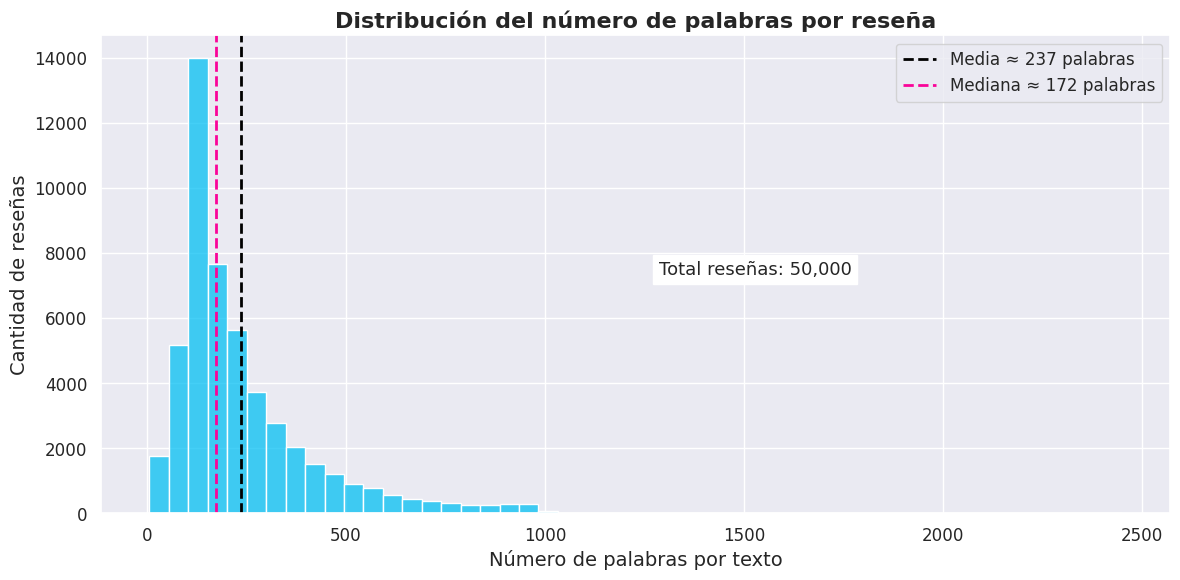

In [160]:
def distribucion_numero_palabras_por_reseña():
  plt.figure(figsize=(12, 6))

  sns.histplot(
      datos['n_palabras'],
      bins = 50,
      color = color_primario
      )

  plt.title(
      "Distribución del número de palabras por reseña",
      fontsize = 16,
      fontweight = "bold"
  )

  plt.xlabel(
      "Número de palabras por texto",
      fontsize = 14
  )

  plt.ylabel(
      "Cantidad de reseñas",
      fontsize = 14
  )

  media = datos['n_palabras'].mean()
  plt.axvline( # muestra la linea punteada que señala el promedio
      media,
      color = 'black',
      linestyle = "--",
      linewidth = 2,
      label = f"Media ≈ {media:.0f} palabras"
  )
  # Línea de referencia: mediana
  mediana = datos['n_palabras'].median()
  plt.axvline(
      mediana,
      color=color_secundario,
      linestyle="--",
      linewidth=2,
      label=f"Mediana ≈ {mediana:.0f} palabras"
  )

  plt.text(
      0.50 * plt.xlim()[1],
      0.50 * plt.ylim()[1],
      f"Total reseñas: {len(datos):,}",
      fontsize=13,
      bbox=dict(facecolor="white")
  )

  plt.legend() # Muestra la leyenda
  plt.tight_layout()
  plt.show()

distribucion_numero_palabras_por_reseña()

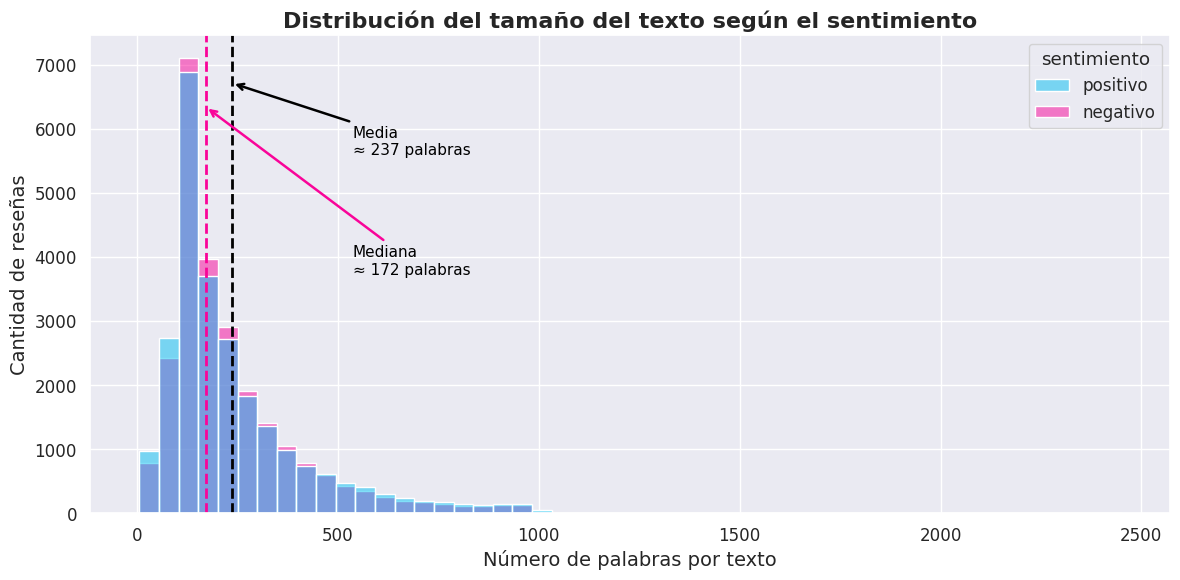

In [191]:
def distribucion_numero_palabras_por_reseña_por_sentimiento():
  fig, ax = plt.subplots(figsize=(12,6))

  sns.histplot(
      data = datos,
      x = 'n_palabras',
      hue = 'sentimiento',
      palette = [color_primario, color_secundario],
      bins=50
  )

  ax.set_title(
      "Distribución del tamaño del texto según el sentimiento",
      fontsize = 16,
      fontweight = "bold"
  )

  ax.set_xlabel(
      "Número de palabras por texto",
      fontsize = 14
  )

  ax.set_ylabel(
      "Cantidad de reseñas",
      fontsize = 14
  )

  media = datos['n_palabras'].mean()
  ax.axvline( # muestra la linea punteada que señala el promedio
      media,
      color = 'black',
      linestyle = "--",
      linewidth = 2,
      label = f"Media ≈ {media:.0f} palabras"
  )
  # Línea de referencia: mediana
  mediana = datos['n_palabras'].median()
  ax.axvline(
      mediana,
      color = color_secundario,
      linestyle = "--",
      linewidth = 2,
      label=f"Mediana ≈ {mediana:.0f} palabras"
  )

  ax.annotate(
      f"Media\n≈ {media:.0f} palabras",
      xy = (media, ax.get_ylim()[1] * 0.9),      # apunta a la línea
      xytext = (media + 300, ax.get_ylim()[1] * 0.75),
      arrowprops = dict(
            arrowstyle = "->",
            color = 'black',
            linewidth = 1.8
            ),
      fontsize = 11,
      color = 'black'
      )

  texto_moda = ('Mediana')
  ax.annotate(
      f"Mediana\n≈ {mediana:.0f} palabras",
        xy = (mediana, ax.get_ylim()[1] * 0.85),      # apunta a la línea
      xytext = (media + 300, ax.get_ylim()[1] * 0.50),
      arrowprops = dict(
            arrowstyle = "->",
            color = color_secundario,
            linewidth = 1.8
            ),
      fontsize = 11,
      color = 'black'
      )

  plt.tight_layout()
  plt.show()

distribucion_numero_palabras_por_reseña_por_sentimiento()

#### Boxplot

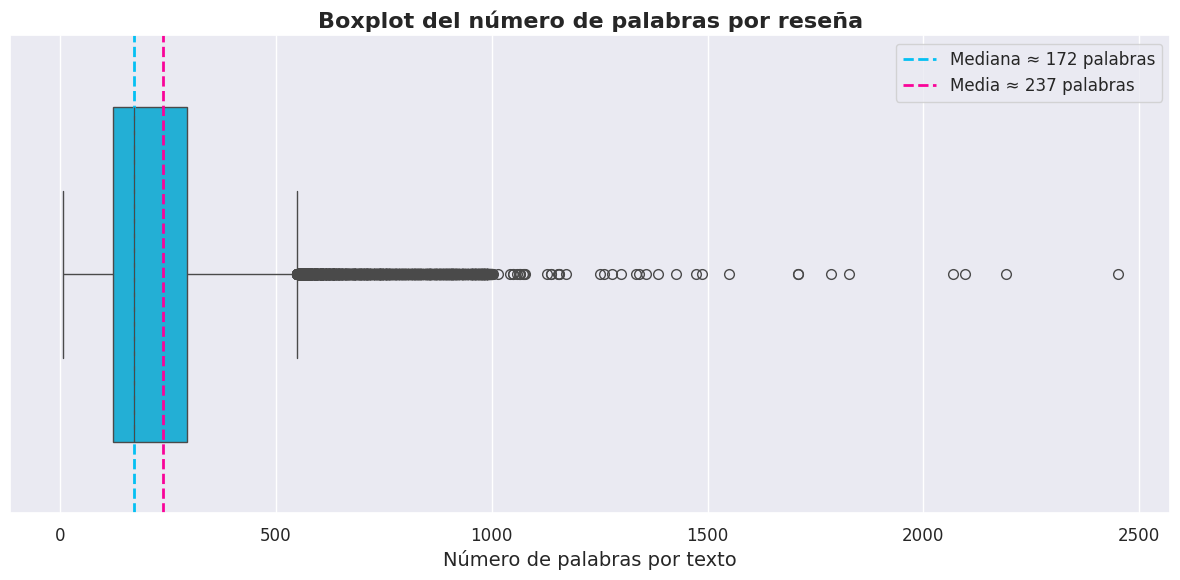

In [189]:
def boxplot_numero_palabras_por_reseña():
  plt.figure(figsize=(12, 6))

  sns.boxplot(
      x = datos['n_palabras'],
      color = color_primario,
      width = 0.7, # Tamaño del boxplot
      fliersize = 7, # Tamaño de los puntos atípicos
  )

  plt.title(
      "Boxplot del número de palabras por reseña",
      fontsize = 16,
      fontweight = "bold"
  )

  plt.xlabel(
      "Número de palabras por texto",
      fontsize = 14
  )

  # Línea de referencia: mediana
  mediana = datos['n_palabras'].median()
  plt.axvline(
      mediana,
      color=color_primario,
      linestyle="--",
      linewidth=2,
      label=f"Mediana ≈ {mediana:.0f} palabras"
  )
  # Línea de referencia: media
  media = datos['n_palabras'].mean()
  plt.axvline(
      media,
      color=color_secundario,
      linestyle="--",
      linewidth=2,
      label=f"Media ≈ {media:.0f} palabras"
  )


  plt.legend()
  plt.tight_layout()
  plt.show()

boxplot_numero_palabras_por_reseña()

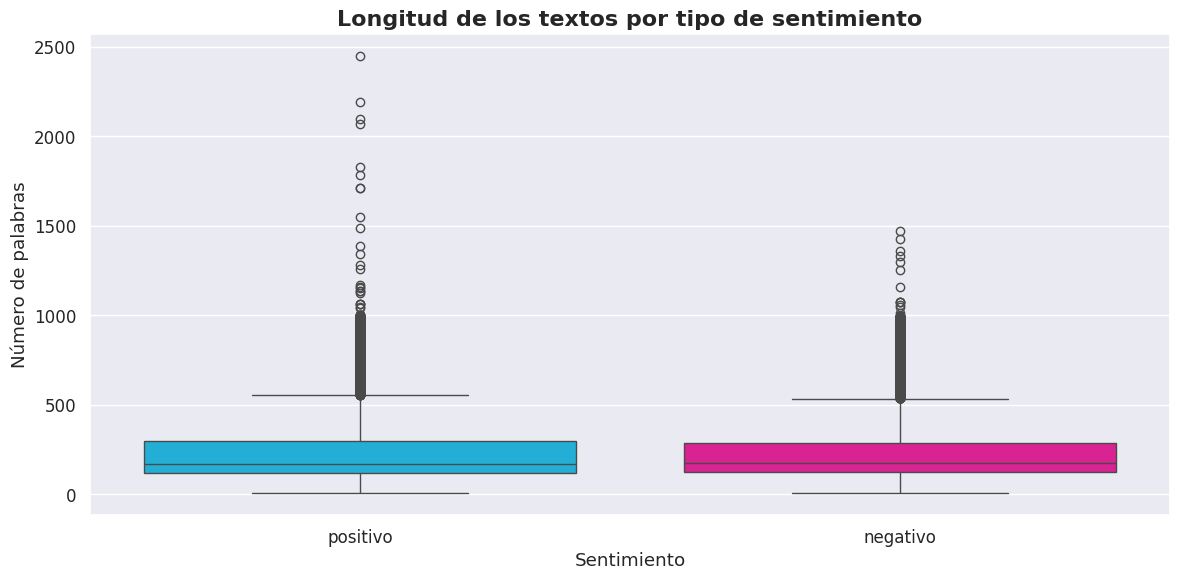

In [198]:
def boxplot_numero_palabras_por_reseña_por_sentimiento():
  plt.figure(figsize=(12,6))

  sns.boxplot(
      data = datos,
      x='sentimiento',
      y = 'n_palabras',
      hue = 'sentimiento',
      palette = [color_primario, color_secundario]
  )

  plt.title(
      "Longitud de los textos por tipo de sentimiento",
      fontsize=16,
      fontweight="bold"
      )

  plt.xlabel("Sentimiento")

  plt.ylabel("Número de palabras")

  plt.tight_layout()
  plt.show()

boxplot_numero_palabras_por_reseña_por_sentimiento()

### **Conclusion**

#### **Conclusiones sobre la calidad de los datos**

* El conjunto de datos no presenta registros duplicados, lo que indica una buena calidad inicial y evita sesgos por repetición de observaciones durante el entrenamiento del modelo.

* Las columnas cuentan con tipos de datos adecuados para el análisis, permitiendo trabajar correctamente con texto y variables categóricas.

#### **Conclusiones sobre la longitud de los textos**

- La longitud de las reseñas presenta alta variabilidad, con una media aproximada de 237 palabras y valores extremos que alcanzan más de 2400 palabras.

- La diferencia entre media y mediana indica una distribución sesgada a la derecha, confirmada por la presencia de múltiples outliers visibles en el boxplot.

- La mayoría de los textos se concentra en rangos bajos y medios de longitud, mientras que un pequeño porcentaje de reseñas muy extensas genera una cola larga en la distribución.

#### **Conclusiones sobre el idioma de los datos**

- Se detectó la presencia de reseñas en más de un idioma (español e inglés) dentro de la columna utilizada para el entrenamiento.

- Esto introduce un posible ruido lingüístico, ya que TF-IDF tratará palabras de ambos idiomas como parte del mismo vocabulario.

#### **Conclusión general del EDA**

El análisis exploratorio confirma que el conjunto de datos es apto para entrenar un modelo de análisis de sentimiento, cumpliendo con los requisitos del MVP propuesto.

Si bien existen desafíos como la alta variabilidad en la longitud de los textos y la presencia de múltiples idiomas, estos no impiden la construcción de un modelo inicial basado en TF-IDF y regresión logística.

El EDA permite identificar claramente oportunidades de mejora que pueden abordarse en iteraciones futuras, alineándose con el enfoque incremental esperado.

## <font color=#05C0F3>**Limpieza de datos**</font>

### **Tratamiento de Valores Nulos e Inconsistencias**

#### Conteo de valores nulos

In [ ]:
datos.isnull().sum()

,0
review_es,0
sentimiento,0
n_palabras,0


No hay valores nulos en ninguna columna

### **Limpieza y Normalización del Texto**

#### Estandarización a minúsculas

In [ ]:
display(datos)

,review_es,sentimiento,n_palabras
0,Uno de los otros críticos ha mencionado que de...,positivo,345
1,Una pequeña pequeña producción.La técnica de f...,positivo,161
2,Pensé que esta era una manera maravillosa de p...,positivo,173
3,"Básicamente, hay una familia donde un niño peq...",negativo,137
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,237
...,...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo,170
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo,105
49997,Soy católica enseñada en escuelas primarias pa...,negativo,246
49998,Voy a tener que estar en desacuerdo con el com...,negativo,232


In [ ]:
datos['review_es_limpio'] = datos['review_es'].str.lower()

In [ ]:
datos['review_es_limpio']

,review_es_limpio
0,uno de los otros críticos ha mencionado que de...
1,una pequeña pequeña producción.la técnica de f...
2,pensé que esta era una manera maravillosa de p...
3,"básicamente, hay una familia donde un niño peq..."
4,"el ""amor en el tiempo"" de petter mattei es una..."
...,...
49995,pensé que esta película hizo un buen trabajo a...
49996,"mala parcela, mal diálogo, mala actuación, dir..."
49997,soy católica enseñada en escuelas primarias pa...
49998,voy a tener que estar en desacuerdo con el com...


#### Eliminación de caracteres especiales y números

Se usa regex (expresiones regulares) para remover símbolos, números o puntuación, lo cual es esencial para el procesamiento de texto

In [ ]:
datos['review_es_limpio'] = datos['review_es_limpio'].str.replace(r'[^a-záéíóúñü\s]', '', regex=True)

In [ ]:
display(datos['review_es_limpio'])

,review_es_limpio
0,uno de los otros críticos ha mencionado que de...
1,una pequeña pequeña producciónla técnica de fi...
2,pensé que esta era una manera maravillosa de p...
3,básicamente hay una familia donde un niño pequ...
4,el amor en el tiempo de petter mattei es una p...
...,...
49995,pensé que esta película hizo un buen trabajo a...
49996,mala parcela mal diálogo mala actuación direcc...
49997,soy católica enseñada en escuelas primarias pa...
49998,voy a tener que estar en desacuerdo con el com...


`[^a-záéíóúñü\s]`

Significa:
  Cualquier carácter que NO sea:
  - letras minúsculas
  - letras con tilde
  - ñ, ü
  - espacios

#### Eliminar espacios múltiples

In [ ]:
datos['review_es_limpio'] = datos['review_es_limpio'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [ ]:
display(datos['review_es_limpio'])

,review_es_limpio
0,uno de los otros críticos ha mencionado que de...
1,una pequeña pequeña producciónla técnica de fi...
2,pensé que esta era una manera maravillosa de p...
3,básicamente hay una familia donde un niño pequ...
4,el amor en el tiempo de petter mattei es una p...
...,...
49995,pensé que esta película hizo un buen trabajo a...
49996,mala parcela mal diálogo mala actuación direcc...
49997,soy católica enseñada en escuelas primarias pa...
49998,voy a tener que estar en desacuerdo con el com...


## <font color=#05C0F3>**Transformación de Características (Feature Engineering)**</font>

In [ ]:
display(datos)

,review_es,sentimiento,n_palabras,review_es_limpio
0,Uno de los otros críticos ha mencionado que de...,positivo,345,uno de los otros críticos ha mencionado que de...
1,Una pequeña pequeña producción.La técnica de f...,positivo,161,una pequeña pequeña producciónla técnica de fi...
2,Pensé que esta era una manera maravillosa de p...,positivo,173,pensé que esta era una manera maravillosa de p...
3,"Básicamente, hay una familia donde un niño peq...",negativo,137,básicamente hay una familia donde un niño pequ...
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,237,el amor en el tiempo de petter mattei es una p...
...,...,...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo,170,pensé que esta película hizo un buen trabajo a...
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo,105,mala parcela mal diálogo mala actuación direcc...
49997,Soy católica enseñada en escuelas primarias pa...,negativo,246,soy católica enseñada en escuelas primarias pa...
49998,Voy a tener que estar en desacuerdo con el com...,negativo,232,voy a tener que estar en desacuerdo con el com...


### **Definición de variables de entrada (X) y salida (y)**

In [ ]:
X = datos['review_es_limpio']

In [ ]:
display(X)

,review_es_limpio
0,uno de los otros críticos ha mencionado que de...
1,una pequeña pequeña producciónla técnica de fi...
2,pensé que esta era una manera maravillosa de p...
3,básicamente hay una familia donde un niño pequ...
4,el amor en el tiempo de petter mattei es una p...
...,...
49995,pensé que esta película hizo un buen trabajo a...
49996,mala parcela mal diálogo mala actuación direcc...
49997,soy católica enseñada en escuelas primarias pa...
49998,voy a tener que estar en desacuerdo con el com...


In [ ]:
y = datos['sentimiento'].map({
    'negativo': 0,
    'positivo': 1
})

In [ ]:
display(y)

,sentimiento
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


### **División de datos en conjuntos de entrenamiento y prueba**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Inicialización del Vectorizador TF-IDF**

El TF-IDF (Term Frequency-Inverse Document Frequency) es la técnica clave que transforma el texto en números, mostrando qué palabras son más importantes para cada documento/reseña.

In [ ]:
stopwords_es = stopwords.words('spanish')

In [ ]:
vectorizador = TfidfVectorizer(
    stop_words = stopwords_es,
    ngram_range = (1, 2),
    max_features = 5000,
    min_df = 5,
    max_df = 0.9
)

### **Ajuste (fit) y Transformación (transform) del conjunto de entrenamiento**

In [ ]:
X_train_tfidf  = vectorizador.fit_transform(X_train)

In [ ]:
display(X_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2665185 stored elements and shape (35000, 5000)>

### **Transformación del conjunto de prueba**

In [ ]:
X_test_tfidf = vectorizador.transform(X_test)

In [ ]:
display(X_test_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1147307 stored elements and shape (15000, 5000)>

#### Dimension

In [ ]:
X_train_tfidf.shape

(35000, 5000)

In [ ]:
X_test_tfidf.shape

(15000, 5000)

## <font color=#05C0F3>**Modelado y Evaluación**</font>

El modelo recomendado es la Regresión Logística, una técnica de clasificación supervisada simple y efectiva para este tipo de problemas.

### **Entrenamiento**

#### Inicialización del modelo de clasificación (Regresión Logística)

In [ ]:
modelo = LogisticRegression(random_state=42)

#### Entrenamiento del modelo

In [ ]:
modelo.fit(X_train_tfidf, y_train, )

LogisticRegression(random_state=42)

#### Predicciones

In [ ]:
y_pred = modelo.predict(X_test_tfidf)

In [ ]:
y_proba = modelo.predict_proba(X_test_tfidf) # Obtiene las probabilidades, esencial para el contrato de la API

### **Evaluación del Desempeño**

#### Cálculo y presentación de métricas

In [ ]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['negativo', 'positivo']))


Reporte de clasificación:
              precision    recall  f1-score   support

    negativo       0.87      0.85      0.86      7411
    positivo       0.86      0.88      0.87      7589

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



## <font color=#05C0F3>**Serialización e Integración con Back-End (Java)**</font>

Esta es la fase de entrega del artefacto. El modelo entrenado y, crucialmente, el vectorizador TF-IDF (necesario para transformar el texto de entrada que envía el BE), deben ser guardados en un formato binario (joblib o pickle)

### **Definición del Pipeline de Predicción**

Para garantizar que el Back-end (BE) pueda hacer predicciones correctas, es mejor serializar el Pipeline completo: Vectorizador + Modelo.

In [ ]:
pipeline_final = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words=stopwords_es,
        ngram_range=(1, 2),
        max_features=5000,
        min_df=5,
        max_df=0.9
    )),
    ('clf', LogisticRegression(random_state=42))
])

### **Reentrenar el pipeline con X y Y**

In [ ]:
pipeline_final.fit(X, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, max_features=5000, min_df=5,
                                 ngram_range=(1, 2),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('clf', LogisticRegression(random_state=42))])

### **Serialización**

In [ ]:
joblib.dump(pipeline_final, 'sentiment_model_1.1.joblib')

['sentiment_model.joblib']

### **Contrato de Integración y Pruebas Locales**

Prueba en Python para simular la predicción, mostrando cómo el modelo toma un texto sin procesar y genera una predicción con probabilidad.

In [ ]:
# Simulación de predicción
texto_ejemplo = "La interfaz es confusa y me hicieron esperar mucho."

In [ ]:
pred_sentimiento = pipeline_final.predict([texto_ejemplo])

In [ ]:
probabilidades = pipeline_final.predict_proba([texto_ejemplo])

In [ ]:
# Sentimiento y su probabilidad asociada (máxima probabilidad)
max_proba = np.max(probabilidades)

In [ ]:
print(f"Predicción: {pred_sentimiento}, Probabilidad: {max_proba:.2f}")

Predicción: [0], Probabilidad: 0.64


#### **FastAPI**

**El siguiente codigo es de prueba y va en el archivo del proyecto en github**

In [ ]:
# Instalaciones
pip install fastapi uvicorn joblib scikit-learn nltk # Se ejecuta en consola

# app.py
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import joblib
import numpy as np

# Cargar el modelo (UNA SOLA VEZ)
app = FastAPI(title="Sentiment Analysis API")

modelo = joblib.load("sentiment_model_1.1.joblib")

# Contrato de entrada (request)
class SentimentRequest(BaseModel):
    text: str
#    {
#        text: "La película fue excelente"
#    }

# Contrato de salida (response)
class SentimentResponse(BaseModel):
    prevision: str
    probabilidad: float

# Endpoint principal /sentiment
@app.post("/sentiment", response_model=SentimentResponse)
def predict_sentiment(request: SentimentRequest):

    texto = request.text.strip()

    if len(texto) < 10:
        raise HTTPException(
            status_code=400,
            detail="El texto es demasiado corto para analizar sentimiento"
        )

    pred = modelo.predict([texto])[0]
    proba = modelo.predict_proba([texto])[0]

    probabilidad_max = float(np.max(proba))

    sentimiento = "Positivo" if pred == 1 else "Negativo"

    return {
        "prevision": sentimiento,
        "probabilidad": round(probabilidad_max, 3)
    }

# Ejecutar el servidor
uvicorn app:app --reload # Se ejecuta en consola

POST http://localhost:8000/sentiment
Content-Type: application/json
# Eso va en:
# Postman
# Swagger
# README
# documentación

# Formato
{
  "text": "La interfaz es confusa y lenta"
}
{
  "prevision": "Negativo",
  "probabilidad": 0.92
}


**Comentario Fast API (Prueba)** **NO EJECUTAR**

**El archivo de Git tendría que tener esta estrucura**

- Modelo_hackathon.ipynb
- app.py
- requirements.txt
- sentiment_model.joblib

In [ ]:
# Arhivo txt, requirements.txt
# Dentro del archivo .txt el siguiente texto:

fastapi
uvicorn
joblib
scikit-learn
nltk
numpy

In [ ]:
# Arhivo py, app.py
# Dentro del archivo .py el siguiente codigo:

from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import joblib
import numpy as np
import os

# Definición de la app
app = FastAPI(title="Sentiment Analysis API")

# Cargar el modelo

MODEL_PATH = "sentiment_model.joblib" # O "sentiment_model_1.1.joblib"

if not os.path.exists(MODEL_PATH):
    raise Exception(f"No se encontró el archivo del modelo en: {MODEL_PATH}")

modelo = joblib.load(MODEL_PATH)

class SentimentRequest(BaseModel):
    text: str

class SentimentResponse(BaseModel):
    prevision: str
    probabilidad: float

@app.post("/sentiment", response_model=SentimentResponse)
def predict_sentiment(request: SentimentRequest):
    texto = request.text.strip()

    if len(texto) < 10:
        raise HTTPException(
            status_code=400,
            detail="El texto es demasiado corto para analizar sentimiento."
        )

    pred = modelo.predict([texto])[0]
    proba = modelo.predict_proba([texto])[0]

    probabilidad_max = float(np.max(proba))

    sentimiento = "Positivo" if pred == 1 else "Negativo"

    return {
        "prevision": sentimiento,
        "probabilidad": round(probabilidad_max, 3)
    }

In [ ]:
# Arhivo ipynb, Modelo_hackathon.ipynb
# El archivo .ipynb crea el archivo (sentiment_model.joblib)
# Descargar el archivo .joblib y colocarlo dentro de la estructura del Git

**Cómo ejecutarlo (Terminal)**

**CMD, Terminal o PowerShell**

- 1. Instalar las librerías (solo la primera vez): pip install -r requirements.txt
- 2. Encender el servidor: uvicorn app:app --reload